# Problem statement:-
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

In [1]:
#Importing the required Libraries
import numpy as np #for scientific computation
import pandas as pd #for data #for data analysis
import matplotlib.pyplot as plt#for data visualization
import seaborn as sns#for data visualization

In [2]:
#Importing the dataset required for data Analysis
df=pd.read_csv(r"C:\Users\Admin\Downloads\news.csv")
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
df.headline[5]

'Whatever the Outcome on November 8th the US Will Be on a Collision Course With China - Federico Pieraccini'

In [4]:
#checking the label value counts
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [5]:
#checking the shape of the dataset
df.shape

(20800, 6)

In [6]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [7]:
#checking the missing values
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [8]:
print ('not fake news = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'percentage')
print ('fake news  = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'percentage')

not fake news =  50.0 percentage
fake news  =  50.0 percentage


In [9]:
df['written_by'].value_counts().head(n=60)

Pam Key                                   243
admin                                     193
Jerome Hudson                             166
Charlie Spiering                          141
John Hayward                              140
Katherine Rodriguez                       124
Warner Todd Huston                        122
Ian Hanchett                              119
Breitbart News                            118
Daniel Nussbaum                           112
AWR Hawkins                               107
Jeff Poor                                 107
Joel B. Pollak                            106
Trent Baker                               102
Breitbart London                           97
Bob Price                                  93
Ben Kew                                    90
Charlie Nash                               88
Pakalert                                   86
Eddy Lavine                                85
Starkman                                   84
Gillian                           

In [10]:
df['orginal_length'] = df.news.str.len()
df.head()


,Unnamed: 0,id,headline,written_by,news,label,orginal_length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936.0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112.0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425.0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516.0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164.0


In [11]:
from nltk.tokenize import  word_tokenize
from nltk.tokenize import sent_tokenize
import string


In [12]:

import nltk.corpus
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [13]:
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
len(stop_words)

179

In [15]:
import nltk
# Another way
stopset = set(nltk.corpus.stopwords.words('english'))

In [16]:
len(stopset)

179

In [17]:
# Adding custome stopwords
stopset.update(('new','old'))
len(stopset)

181

In [18]:
stopset

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'old',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'ov

In [19]:
# import string
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# Remove stopwords and punctuations from the above set os texts

import nltk
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
punct =string.punctuation

In [22]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# Lets check those punctuations
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
df['news'][0]

'WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family business ventures  —   four   companies  —   while serving as governor. Mr

In [25]:
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','dont','doin','ure','and','on','us','one'])
punct =string.punctuation
df['news'] = df['news'].str.lower()
df['news']=df['news'].str.replace("‘", "")
df['news']=df['news'].str.replace("’", "")

# Replace URLs with ''

df['news'] = df['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '')
df['news'] = df['news'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                '')

# Replace numbers with 'numbr'
df['news'] = df['news'].str.replace(r'\d+(\.\d+)?', '')
# Remove punctuation
df['news'] = df['news'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['news'] = df['news'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['news'] = df['news'].str.replace(r'^\s+|\s+?$', '')


df['news']=df['news'].apply(lambda x: str(x))
df['news'] = df['news'].str.replace("-",'')
df["news"]=df.news.str.replace('[^\w\.]',' ')
df["news"]=df.news.str.replace("â",'')

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 

In [26]:
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['news'] = df['news'].apply(lambda x: convert(x))

In [27]:
df['news'][0]

'washington in sonny perdues telling georgians were growing weary of the corruption and scandals in their state when he took over as governor in a time when he gave his own version of a drain the swamp pledge my first goal as governor is to restore public trust in state government by changing the culture of state government mr perdue told a leadership conference at kennesaw state university in april our form of government depends on a mutual bond of trust between the people and their government but people have become cynical about their government but mr perdue a republican who is awaiting confirmation to serve as president trumps agriculture secretary became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor the criticism centers on the fact that as mr trump has he continued to own or help run his family business ventures four companies while serving as governor mr perdue is one of the last cabinet members awaiting sena

In [28]:
df["news"]=df.news.str.replace(".",'')
df["news"]=df.news.str.replace('\s+',' ')

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [29]:
df["news"][10]

'breaking clinton fixer reveals sick smear hillary ordered against monica should i call her and talk this through or better to leave with you podesta had written at pm im worried shell get on with cheryl and well end up in a bad place im in a session that lasts till your time is that timely or should i walk out was was unclear was why clinton needed to be sobered up so early in the day had she been consuming certain medications that had left her woozy had she been puffing marijuana joints had she been drinking booze advertisement story continues below or was she simply not taking the situation seriously whatever it was and needed to be made to understood reality i e was sobered up being used metaphorically it was known that the democrat nominee had a penchant for drinking while on the campaign trail she likes to drink amy chozick national political reporter for the the new york times told abc news in february of six months before the email was sent we were on the campaign trail in and 

In [30]:
df = df.dropna(subset=['headline'])
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','dont','doin','ure','and','on','us','one'])
punct =string.punctuation 
df['headline'] = df['headline'].str.lower()
df['headline']=df['headline'].str.replace("‘", "")
df['headline']=df['headline'].str.replace("’", "")



df['headline'] = df['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['headline'] = df['headline'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['headline'] = df['headline'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['headline'] = df['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df['headline'] = df['headline'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df['headline'] = df['headline'].str.replace(r'\d+(\.\d+)?', ' ')
df['headline']=df['headline'].apply(lambda x: str(x))
df['headline'] = df['headline'].str.replace("-",'')
df["headline"]=df.news.str.replace('[^\w\.]',' ')
df["headline"]=df.news.str.replace("â",'')


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in

In [31]:
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['headline'] = df['headline'].apply(lambda x: convert(x))

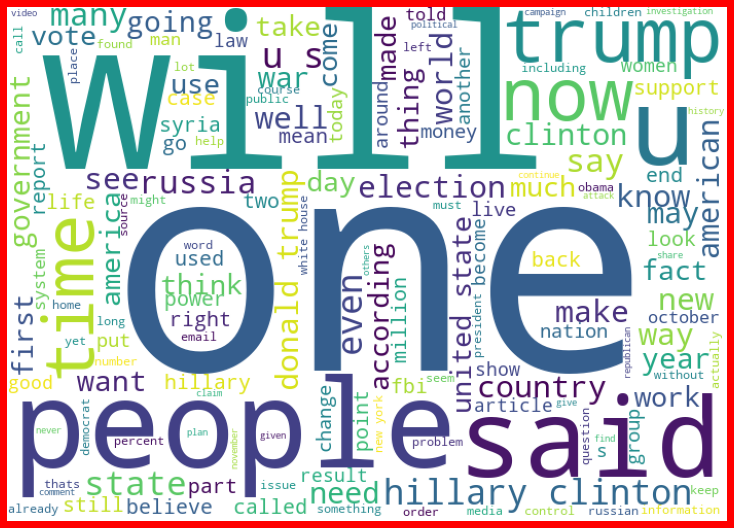

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spams = df['headline'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

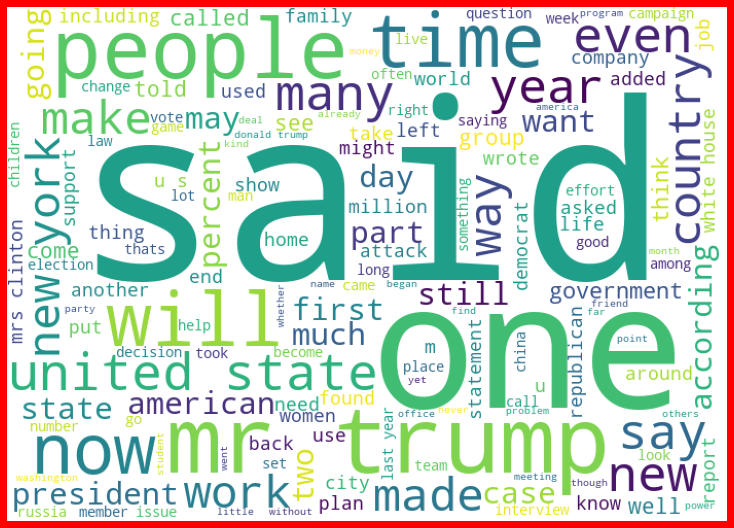

In [33]:
from wordcloud import WordCloud


spams = df['headline'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
df2=pd.read_csv(r"C:\Users\Admin\Downloads\news.csv")

In [35]:
df2.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [36]:
df2.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [37]:
df2 = df2.dropna(subset=['news'])

In [38]:
df2

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [39]:
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','im','dont','doin','ure','i','apple-iss','one','c','e'])
 
df2['news'] = df2['news'].str.lower()


df2['news'] = df2['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df2['news'] = df2['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df2['news'] = df2['news'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df2['news'] = df2['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df2['news'] = df2['news'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df2['news'] = df2['news'].str.replace(r'\d+(\.\d+)?', ' ')
df2['news']=df2['news'].apply(lambda x: str(x))
df2['news'] = df2['news'].str.replace("'",' ')
df2['news'] = df2['news'].str.replace("-",' ')
df2["news"]=df2.news.str.replace('[^\w\.]',' ')
df2['news'] = df2['news'].str.replace("_____",' ')


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: FutureW

In [40]:
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df2['news'] = df2['news'].apply(lambda x: convert(x))

In [41]:
pip install gensim

You are using pip version 19.0.3, however version 21.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [42]:
import re

import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("â",'',sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df2.news.values.tolist()
data_words = list(sent_to_words(data))
print(data[:1])

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['washington   sonny perdue s telling  georgians growing weary corruption scandals state took governor   time gave version  drain swamp  pledge.  my first goal governor restore public trust state government changing culture state government   mr. perdue told leadership conference kennesaw state university april  .  our form government depends mutual bond trust people government. people become cynical government.   mr. perdue  republican awaiting confirmation serve president trump s agriculture secretary  became target frequent criticism failing honor ethics pledge eight years governor. criticism centers fact that  mr. trump has  continued help run family business ventures   four companies   serving governor. mr. perdue last cabinet members awaiting senate confirmation. date set confirmation hearing holdup release paperwork accompanying nomination federal office government ethics blamed delay. office must examine mr. perdue s proposal avoid conflicts interest running u. s. d. a. departm

In [43]:
import gensim
dictionary_label_0 = gensim.corpora.Dictionary(data_words)
print(dictionary_label_0)

Dictionary(172048 unique tokens: ['acceptable', 'accompanying', 'according', 'acting', 'action']...)


In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(data)) 
texts=listToString(data)
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(texts)
from nltk.probability import FreqDist


stoplist=['.','t','â','re','i','iâ','s','it']

filtered_tokenized_text = [word for word in tokenized_word if word not in stoplist]

fdist = FreqDist(filtered_tokenized_text)

In [46]:
fdist.most_common(20)

[('said', 80044),
 ('mr.', 65830),
 ('trump', 56249),
 ('would', 37358),
 ('people', 36528),
 ('new', 30057),
 ('clinton', 27388),
 ('like', 26333),
 ('also', 25445),
 ('president', 25329),
 ('time', 21100),
 ('state', 20347),
 ('us', 20147),
 ('could', 19352),
 ('many', 19223),
 ('even', 18936),
 ('years', 17869),
 ('states', 17618),
 ('two', 17477),
 ('the', 17405)]

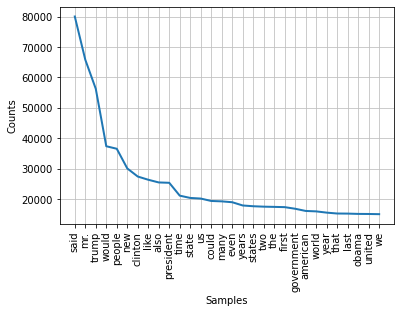

In [47]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [48]:
df3=pd.read_csv(r"C:\Users\Admin\Downloads\news.csv")
df3.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [49]:
df3 = df3.dropna(subset=['news'])
stop_words = set(stopwords.words('english') +  ['ü','ur','4','2','im','dont','doin','ure','i','apple-iss','one','c','e'])
 
df3['news'] = df3['news'].str.lower()


df3['news'] = df3['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df3['news'] = df3['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df3['news'] = df3['news'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df3['news'] = df3['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df3['news'] = df3['news'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df3['news'] = df3['news'].str.replace(r'\d+(\.\d+)?', ' ')
df3['news']=df3['news'].apply(lambda x: str(x))
df3['news'] = df3['news'].str.replace("'",' ')
df3['news'] = df3['news'].str.replace("-",' ')
df3["news"]=df3.news.str.replace('[^\w\.]',' ')
df3['news'] = df3['news'].str.replace("_____",' ')
df3['news'] = df3['news'].str.replace("â",'')

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The default v

In [50]:
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df3['news'] = df3['news'].apply(lambda x: convert(x))

In [51]:
import re

import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("â",'',sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data2 = df3.news.values.tolist()
data_words2 = list(sent_to_words(data2))
print(data2[:1])

['washington   sonny perdue s telling  georgians growing weary corruption scandals state took governor   time gave version  drain swamp  pledge.  my first goal governor restore public trust state government changing culture state government   mr. perdue told leadership conference kennesaw state university april  .  our form government depends mutual bond trust people government. people become cynical government.   mr. perdue  republican awaiting confirmation serve president trump s agriculture secretary  became target frequent criticism failing honor ethics pledge eight years governor. criticism centers fact that  mr. trump has  continued help run family business ventures   four companies   serving governor. mr. perdue last cabinet members awaiting senate confirmation. date set confirmation hearing holdup release paperwork accompanying nomination federal office government ethics blamed delay. office must examine mr. perdue s proposal avoid conflicts interest running u. s. d. a. departm

In [52]:
dictionary_label_1 = gensim.corpora.Dictionary(data_words2)

In [53]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(data2)) 
texts2=listToString(data2)
from nltk.tokenize import word_tokenize


tokenized_word2=word_tokenize(texts2)
fdist2 = FreqDist(tokenized_word2)

In [54]:
stoplist=['.','ð','ñ','t','ù','ø','ð¾ñ','ð¾ð','i','s']
filtered_tokenized_text2 = [word for word in tokenized_word2 if word not in stoplist]

fdist2 = FreqDist(filtered_tokenized_text2)

In [55]:
fdist2.most_common(30)

[('said', 80044),
 ('mr.', 65830),
 ('trump', 56260),
 ('would', 37358),
 ('it', 36919),
 ('people', 36530),
 ('new', 30058),
 ('clinton', 27430),
 ('like', 26333),
 ('also', 25445),
 ('president', 25330),
 ('time', 21101),
 ('state', 20349),
 ('us', 20147),
 ('could', 19352),
 ('many', 19223),
 ('even', 18936),
 ('years', 17869),
 ('states', 17620),
 ('two', 17477),
 ('the', 17411),
 ('first', 17322),
 ('government', 16793),
 ('american', 16070),
 ('world', 15930),
 ('year', 15514),
 ('that', 15236),
 ('last', 15195),
 ('obama', 15102),
 ('united', 15070)]

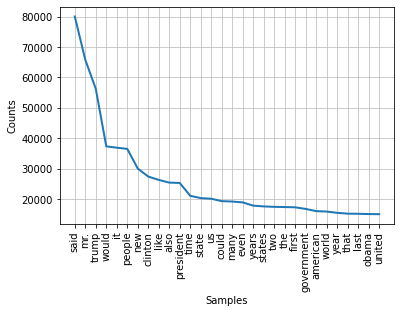

In [56]:
import matplotlib.pyplot as plt
fdist2.plot(30,cumulative=False)
plt.show()

In [57]:
df['clean_length'] = df.news.str.len()

df.head(5)

,Unnamed: 0,id,headline,written_by,news,label,orginal_length,clean_length
0,0,9653,washington in sonny perdues telling georgians ...,Eric Lipton and Steve Eder,washington in sonny perdues telling georgians ...,0,7936.0,7523
1,1,10041,houston venezuela had a plan it was a tactical...,David Waldstein,houston venezuela had a plan it was a tactical...,0,6112.0,5799
2,2,19113,sunday on abcs this week while discussing the ...,Pam Key,sunday on abcs this week while discussing the ...,0,425.0,399
3,3,6868,augusta me the beleaguered republican governor...,Jess Bidgood,augusta me the beleaguered republican governor...,0,6516.0,6242
4,4,7596,finian cunningham has written extensively on i...,Finian Cunningham,finian cunningham has written extensively on i...,1,9164.0,8876


In [61]:
print (df['orginal_length'])
print(df['clean_length'])

0         7936.0
1         6112.0
2          425.0
3         6516.0
4         9164.0
          ...   
20794    19894.0
20796     6621.0
20797     3433.0
20798     2334.0
20799     1932.0
Name: orginal_length, Length: 20242, dtype: float64
0         7523
1         5799
2          399
3         6242
4         8876
         ...  
20794    18753
20796     6394
20797     3346
20798     2092
20799     1842
Name: clean_length, Length: 20242, dtype: int64


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


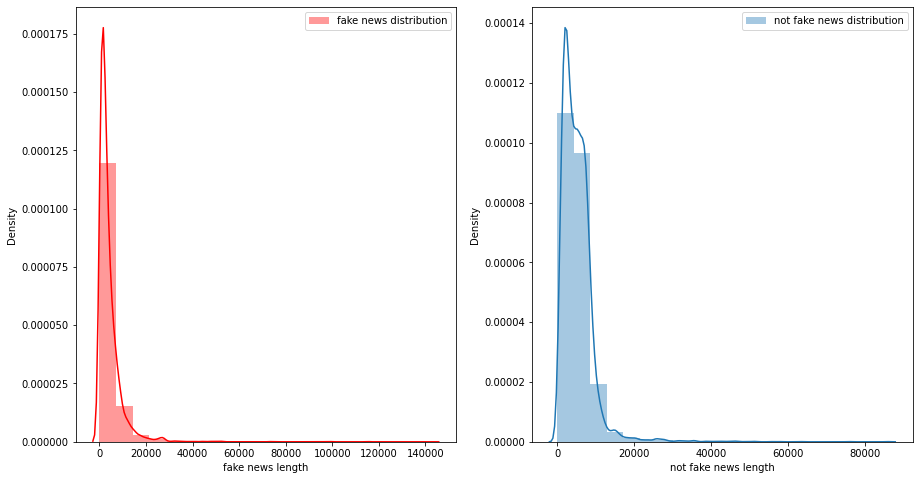

In [63]:
import seaborn as sns
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['orginal_length'],bins=20,ax=ax[0],label='fake news distribution',color='r')

ax[0].set_xlabel('fake news length')
ax[0].legend()

sns.distplot(df[df['label']==0]['orginal_length'],bins=20,ax=ax[1],label='not fake news distribution')
ax[1].set_xlabel('not fake news length')
ax[1].legend()

plt.show()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


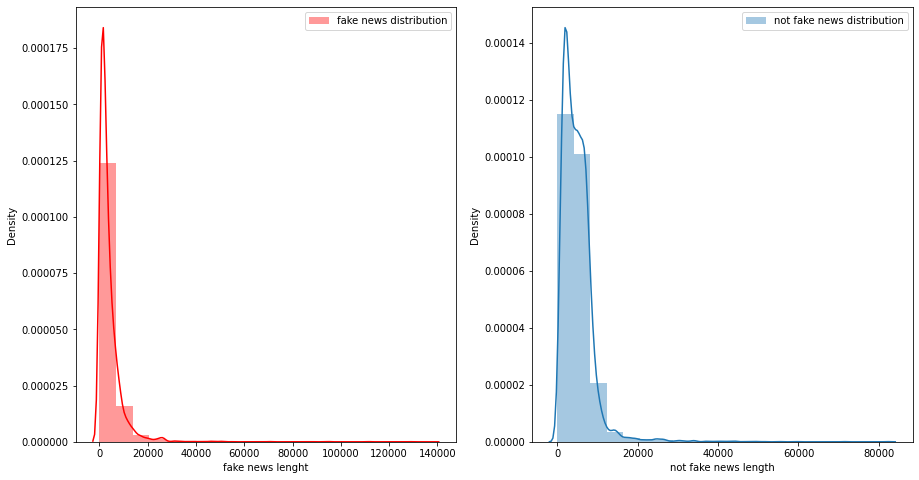

In [64]:
import seaborn as sns
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='fake news distribution',color='r')

ax[0].set_xlabel('fake news lenght')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='not fake news distribution')
ax[1].set_xlabel('not fake news length')
ax[1].legend()

plt.show()

In [65]:
from textblob import TextBlob
df['polarity']=df['news'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [66]:
print("5 Random news with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:5].index]['news']):
  print('news {}:\n'.format(index+1),review)

5 Random news with Highest Polarity:
news 1:
 hong kong there were no banners no raised fists as night fell on tuesday more than a thousand protesters dressed in black held a silent march through the central business area of hong kong they took care not to jaywalk then they quietly dispersed into the night collectively the participants in the march had more power than most demonstrators they were hong kong lawyers angered by chinas move on monday to effectively rewrite a clause in hong kongs charter in order to prevent two young politicians from taking office as legislators as a group hong kongs lawyers say beijings decision to step into a legal case in this city has dealt a blow to its judiciary famed for its fairness and independence and central to hong kongs success as a global financial hub the local bar association called the decision announced by chinas parliament unnecessary and inappropriate and damaging to the concept of one country two systems that has allowed this former bri

In [67]:
print("5 Random news with Highest Polarity:")
for index,news in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:5].index]['news']):
  print('news {}:\n'.format(index+1),news)

5 Random news with Highest Polarity:
news 1:
 president donald j trump is already tired of the leaks coming from his administration and vows to catch those involved in the criminal act the spotlight has finally been put on the leakers they will be caught he wrote on twitter on thursday morning trump reacted to ongoing news stories surrounding the resignation of national security adviser michael flynn after intelligence sources leaked transcripts of his phone calls with russian officials leaking and even illegal classified leaking has been a big problem in washington for years trump added failing new york times and others must apologize on wednesday trump described the leaks as a criminal act during a press conference with israeli prime minister benjamin netanyahu its a criminal act and its been going on for a long time before me but now its really going on he said
news 2:
 kim severson is filling in for sam sifton who emails readers of cooking five days a week to talk about food and su

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['news'])

X = features
y = df['label']

In [79]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
naive = MultinomialNB()

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)


print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8361983797668445


In [70]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15181, 182481)
(15181,)
(5061, 182481)
(5061,)


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2674
           1       0.99      0.66      0.79      2387

    accuracy                           0.84      5061
   macro avg       0.88      0.83      0.83      5061
weighted avg       0.87      0.84      0.83      5061



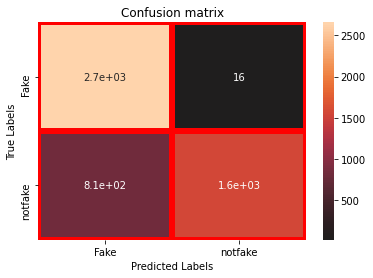

In [73]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Fake','notfake'])
ax.yaxis.set_ticklabels(['Fake','notfake'])
plt.show()

In [74]:
conf_mat

array([[2658,   16],
       [ 813, 1574]], dtype=int64)

In [75]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [80]:
y_pred_prob=naive.predict_proba(x_test)[:,-1]
y_pred_prob

array([0.4919307 , 0.16983336, 0.03542109, ..., 0.97256802, 0.51582123,
       0.68952583])

In [82]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [83]:
auc_score=roc_auc_score(y_test,naive.predict(x_test))

In [84]:
auc_score

0.8267107828837267

In [85]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [86]:
pred=lg.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.9468484489231377


In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2674
           1       0.93      0.95      0.94      2387

    accuracy                           0.95      5061
   macro avg       0.95      0.95      0.95      5061
weighted avg       0.95      0.95      0.95      5061



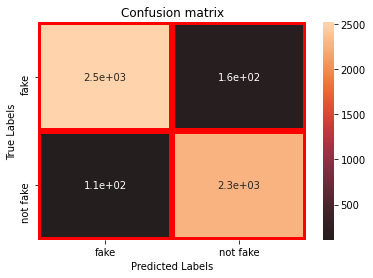

In [88]:
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['fake','not fake'])
ax.yaxis.set_ticklabels(['fake','not fake'])
plt.show()

In [89]:
conf_mat

array([[2515,  159],
       [ 110, 2277]], dtype=int64)

In [90]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [91]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [92]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [93]:
auc_score

0.9472277848818974

In [94]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(X_train,Y_train)
preddct=dct.predict(x_test)
print(classification_report(y_test,preddct))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2674
           1       0.87      0.87      0.87      2387

    accuracy                           0.88      5061
   macro avg       0.88      0.88      0.88      5061
weighted avg       0.88      0.88      0.88      5061



In [95]:
conf_mat = confusion_matrix(y_test,preddct)
conf_mat

array([[2352,  322],
       [ 303, 2084]], dtype=int64)

In [96]:
y_pred_prob=dct.predict_proba(x_test)[:,1]

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [98]:
auc_score=roc_auc_score(y_test,dct.predict(x_test))
auc_score

0.8763217866409895

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_predict=rf.predict(x_test) 
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2674
           1       0.93      0.89      0.91      2387

    accuracy                           0.91      5061
   macro avg       0.92      0.91      0.91      5061
weighted avg       0.91      0.91      0.91      5061



In [100]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [101]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [102]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.9130324159879978

In [103]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(X_train,Y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8565500889152341
[[2236  438]
 [ 288 2099]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2674
           1       0.83      0.88      0.85      2387

    accuracy                           0.86      5061
   macro avg       0.86      0.86      0.86      5061
weighted avg       0.86      0.86      0.86      5061



In [104]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(X_train,Y_train)
svc.score(x_test,y_test)

0.9636435487057894

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
predknn=knn.predict(x_test)
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.96      0.26      0.41      2674
           1       0.54      0.99      0.70      2387

    accuracy                           0.61      5061
   macro avg       0.75      0.63      0.56      5061
weighted avg       0.77      0.61      0.55      5061



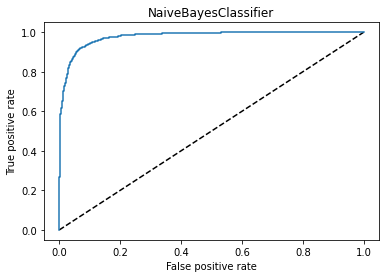

In [106]:
y_pred_prob=naive.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='NaiveBayesClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NaiveBayesClassifier')
plt.show()

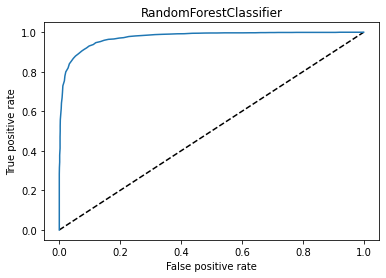

In [107]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

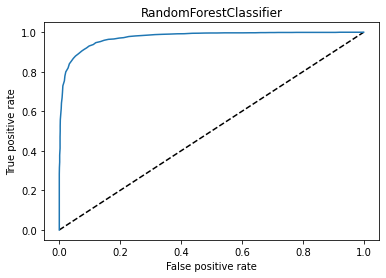

In [108]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

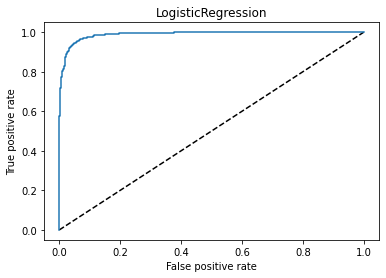

In [109]:
y_pred_prob=lg.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

In [110]:
 observation:- svm and logistic regression had best  accuracy score  and good auc roc score